In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import datasets

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

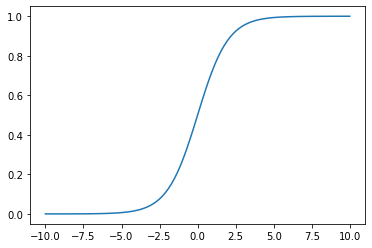

In [2]:
z = np.linspace(-10, 10, 100)
phi = 1 / (1 + np.exp(-z))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(z, phi)
plt.show()

In [3]:
X = np.random.random((10000, 2))

y_noise = np.random.randn(10000) * 0.1
y = (X[:, 0] + X[:, 1] + y_noise < 1).astype(int)
y

array([1, 0, 0, ..., 0, 1, 1])

[]

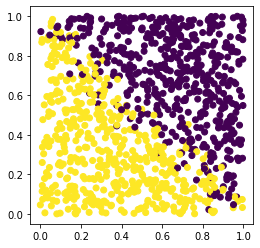

In [4]:
X_train = X[0:9000]
y_train = y[0:9000]
X_test = X[9001:len(X)]
y_test = y[9001:len(y)]

plt.figure(figsize=(4, 4), facecolor='white')
plt.scatter(X_train[:1000, 0], X_train[:1000, 1], c=y_train[:1000])
plt.plot()

In [5]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
hist = model.fit(X_train, y_train, epochs=30, verbose=1)
scores = model.evaluate(X_test, y_test)
print(scores)

Epoch 1/30
282/282 [==============================] - 0s 1ms/step - loss: 0.7077 - accuracy: 0.5068
Epoch 2/30
282/282 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5886
Epoch 3/30
282/282 [==============================] - 0s 1ms/step - loss: 0.6521 - accuracy: 0.6412
Epoch 4/30
282/282 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.6843
Epoch 5/30
282/282 [==============================] - 0s 1ms/step - loss: 0.6057 - accuracy: 0.7217
Epoch 6/30
282/282 [==============================] - 0s 1ms/step - loss: 0.5843 - accuracy: 0.7498
Epoch 7/30
282/282 [==============================] - 0s 1ms/step - loss: 0.5642 - accuracy: 0.7763
Epoch 8/30
282/282 [==============================] - 0s 1ms/step - loss: 0.5454 - accuracy: 0.7973
Epoch 9/30
282/282 [==============================] - 0s 1ms/step - loss: 0.5276 - accuracy: 0.8157
Epoch 10/30
282/282 [==============================] - 0s 1ms/step - loss: 0.5110 - accuracy: 0.8308

In [7]:
weights = model.get_weights()
weights

[array([[-3.8150334],
        [-3.9798472]], dtype=float32),
 array([3.769514], dtype=float32)]

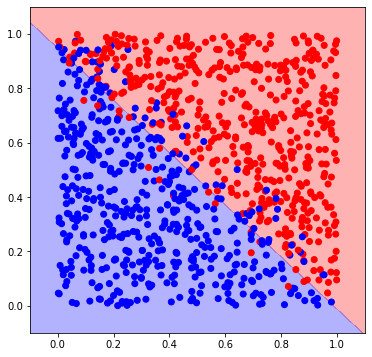

In [8]:
x0_min = X_test[:, 0].min() - 0.1
x0_max = X_test[:, 0].max() + 0.2
x1_min = X_test[:, 1].min() - 0.1
x1_max = X_test[:, 1].max() + 0.2
X_0_mesh, X_1_mesh = np.meshgrid(np.arange(x0_min, x0_max, 0.1), np.arange(x1_min, x1_max, 0.1))
y_pred = model.predict(np.array([X_0_mesh.ravel(), X_1_mesh.ravel()]).T)
y_pred = y_pred.reshape(X_0_mesh.shape)

colors = ['red', 'blue']
cmap = ListedColormap(colors)

plt.figure(figsize=(6, 6), facecolor='white')
plt.contourf(X_0_mesh, X_1_mesh, y_pred, alpha=0.3, cmap=cmap, levels=1)
plt.scatter(X_test[:1000, 0], X_test[:1000, 1], c=y_test[:1000], cmap=cmap)

[]

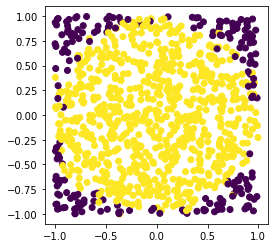

In [9]:
X = np.random.random((10000, 2)) * 2 - 1

y_noise = np.random.randn(10000) * 0.1
y = (np.power(X[:, 0], 2) + np.power(X[:, 1], 2) + y_noise < 1).astype(int)

X_train = X[0:9000]
y_train = y[0:9000]
X_test = X[9001:len(X)]
y_test = y[9001:len(y)]

plt.figure(figsize=(4, 4), facecolor='white')
plt.scatter(X_train[:1000, 0], X_train[:1000, 1], c=y_train[:1000])
plt.plot()

In [10]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
hist = model.fit(X_train, y_train, epochs=30, verbose=1)
scores = model.evaluate(X_test, y_test)
print(scores)

Epoch 1/30
282/282 [==============================] - 0s 1ms/step - loss: 0.7182 - accuracy: 0.5537
Epoch 2/30
282/282 [==============================] - 0s 1ms/step - loss: 0.6458 - accuracy: 0.6744
Epoch 3/30
282/282 [==============================] - 0s 1ms/step - loss: 0.5982 - accuracy: 0.7833
Epoch 4/30
282/282 [==============================] - 0s 1ms/step - loss: 0.5686 - accuracy: 0.7783
Epoch 5/30
282/282 [==============================] - 0s 1ms/step - loss: 0.5511 - accuracy: 0.7771
Epoch 6/30
282/282 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.7771
Epoch 7/30
282/282 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.7771
Epoch 8/30
282/282 [==============================] - 0s 1ms/step - loss: 0.5332 - accuracy: 0.7771
Epoch 9/30
282/282 [==============================] - 0s 1ms/step - loss: 0.5318 - accuracy: 0.7771
Epoch 10/30
282/282 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7771

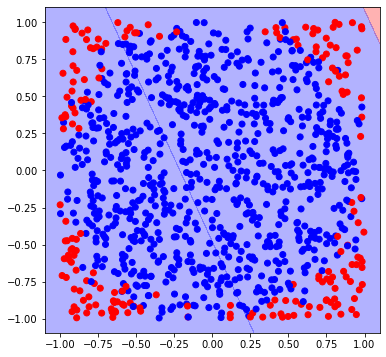

In [12]:
x1_min = X_test[:, 0].min() - 0.1
x1_max = X_test[:, 0].max() + 0.2
x2_min = X_test[:, 1].min() - 0.1
x2_max = X_test[:, 1].max() + 0.2
X_0_mesh, X_1_mesh = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
y_pred = model.predict(np.array([X_0_mesh.ravel(), X_1_mesh.ravel()]).T)
y_pred = y_pred.reshape(X_0_mesh.shape)

colors = ['red', 'blue']
cmap = ListedColormap(colors)

plt.figure(figsize=(6, 6), facecolor='white')
plt.contourf(X_0_mesh, X_1_mesh, y_pred, alpha=0.3, cmap=cmap, levels=1)
plt.scatter(X_test[:1000, 0], X_test[:1000, 1], c=y_test[:1000], cmap=cmap)

In [13]:
iris = datasets.load_iris()

In [14]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
iris.data.shape

(150, 4)

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
print(iris.data[0], iris.target[0])

[5.1 3.5 1.4 0.2] 0


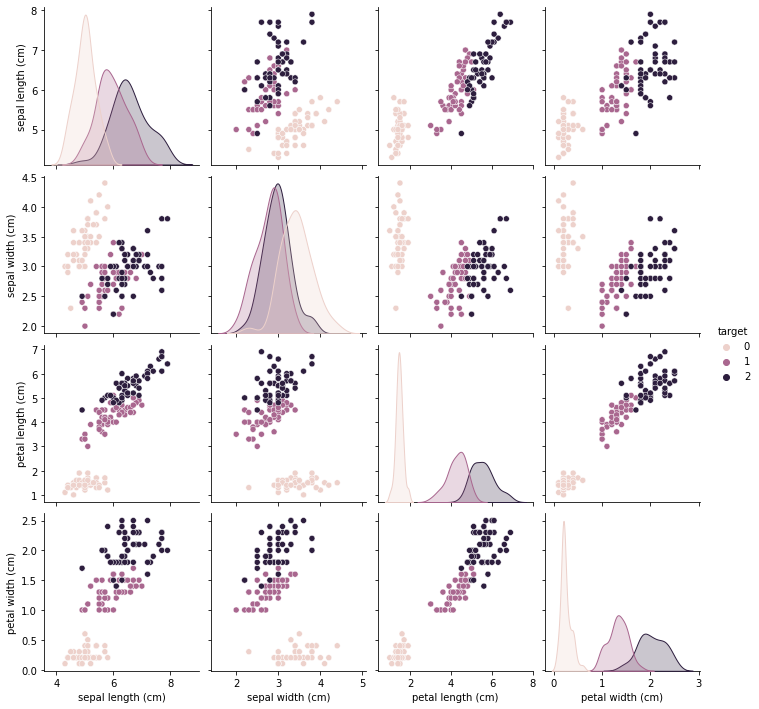

In [19]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
sns.pairplot(df, hue="target")

In [20]:
y = np.array(iris.target)
y = to_categorical(y)

X = iris.data[:, [0, 2]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42)
print(len(X_train), len(X_test))

100 50


In [23]:
model = Sequential()
model.add(Dense(3, input_dim=2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
checkpoint_path = 'training/best.ckpt'

cp_callback = ModelCheckpoint(checkpoint_path,
                              monitor='loss',
                              save_best_only=True,
                              save_weights_only=True)

hist = model.fit(X_train,
                 y_train,
                 epochs=1000,
                 verbose=1,
                 callbacks=[cp_callback])

model.load_weights(checkpoint_path)
scores = model.evaluate(X_test, y_test)
print(scores)

Epoch 1/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.2973 - accuracy: 0.3500
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.2697 - accuracy: 0.3500
Epoch 3/1000
4/4 [==============================] - 0s 5ms/step - loss: 3.2425 - accuracy: 0.3500
Epoch 4/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.2174 - accuracy: 0.3500
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 3.1933 - accuracy: 0.3500
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.1719 - accuracy: 0.3500
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.1511 - accuracy: 0.3500
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.1309 - accuracy: 0.3500
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.1112 - accuracy: 0.3500
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.0919 - accuracy: 0.3500
Epoch 11/1000
4/4 [

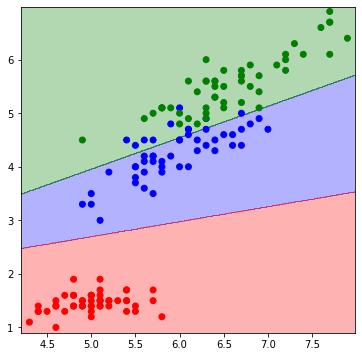

In [25]:
x1_min = X[:, 0].min() - 0.1
x1_max = X[:, 0].max() + 0.1
x2_min = X[:, 1].min() - 0.1
x2_max = X[:, 1].max() + 0.1
X_0_mesh, X_1_mesh = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
y_pred = model.predict(np.array([X_0_mesh.ravel(), X_1_mesh.ravel()]).T)
y_pred = np.argmax(y_pred, axis=1)
y_pred = y_pred.reshape(X_0_mesh.shape)

y = np.argmax(y, axis=1)

colors = ['red', 'blue', 'green']
cmap = ListedColormap(colors)

plt.figure(figsize=(6, 6), facecolor='white')
plt.contourf(X_0_mesh, X_1_mesh, y_pred, alpha=0.3, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [26]:
weights = model.get_weights()
weights

[array([[ 0.58111423,  0.12990968, -0.35826296],
        [-1.5860096 ,  0.02653109,  0.8576263 ]], dtype=float32),
 array([ 1.5028294 , -0.58523154, -1.43205   ], dtype=float32)]